<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Building a Linear Regression

Week 3 | 1.2

---

We will start by creating the "simple linear regression" which means the prediction of an target variable by one predictor variable.

If $Y$ is our target variable and $X$ is our predictor variable, then the function defining the relationship between $X$ and $Y$ is:

### $$y = \beta_0 + \beta_1*x_1 + \epsilon_1$$

Where $\beta_0$, the first coefficient, is an offset commonly known as the intercept. Without the intercept term the regression line would always have to pass through the origin, which is almost never an optimal fit.

$\beta_1$ is the coefficient that multiplies the values of $X_1$ to estimate as close as possible the values of $Y$. Each value of $X_1$ is multiplied by the same coefficient as linear regression models a _linear_ relationship between our predictor and target variable. I've denoted $X$ as $X_1$ here to indicate it is the "first" variable we are modeling $Y$ with. In multiple regression there would be more than one $X$.

$\epsilon_1$ is the noise, or error. This is the difference between the predicted and true values that are unexplained by $X$ in the regression.

---

### Load real estate data

For this lab you'll be using a very simple dataset on housing prices. Load it from wherever you've put in on your computer. My path is below.

The variables are:

    sqft: the size of the house in sq. ft
    bdrms: number of bedrooms
    age: age in years of house
    price: the price of the house
    
I recommend converting price into units of 1000.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
house = '/Users/kiefer/github-repos/DSI-SF-4/datasets/housing_data/housing-data.csv'
house = pd.read_csv(house)

In [4]:
house.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [5]:
house.price = house.price/1000.
house.head()

,sqft,bdrms,age,price
0,2104,3,70,399.9
1,1600,3,28,329.9
2,2400,3,44,369.0
3,1416,2,49,232.0
4,3000,4,75,539.9


---

### Target and predictor variables

Define a target variable and predictor variable from the dataset. Often target and predictor are called dependent and independent variables in the context of linear regression. There are many different names for variables in models, but I generally stick to target and predictor.

In [6]:
price = house.price.values
print price[0:10]
sqft = house.sqft.values
print sqft[0:10]

[ 399.9    329.9    369.     232.     539.9    299.9    314.9    198.999
  212.     242.5  ]
[2104 1600 2400 1416 3000 1985 1534 1427 1380 1494]


---

### Simple linear regression equation

Our equation for the predicted values of our target variable is:

### $$\hat{y} = \beta_0 + \beta_1*x$$

$\hat{y}$ is the commonly used notation for the _predicted_ value of $y$.

(The $\epsilon$ error term is gone - it is an unknowable variable (if we knew what it was, we could perfectly model our target variable).

Write a function that will calculate a predicted $y$ ($\hat{y}$) from your $x$ variable and $\beta$ coefficients. 


In [7]:
def calculate_yhat(x, b0, b1):
    return x*b1 + b0

---

### Plot a regression line

Set $\beta_0$ to be 0 and $\beta_1$ to be 1. This will create a regression line that passes through the origin (0,0) at a 45 degree angle.

#### Plot your target variable points and your currently poorly predicted points and regression line. 

Use your function above to calculate the predicted points.

In [8]:
b0, b1 = 0., 1.

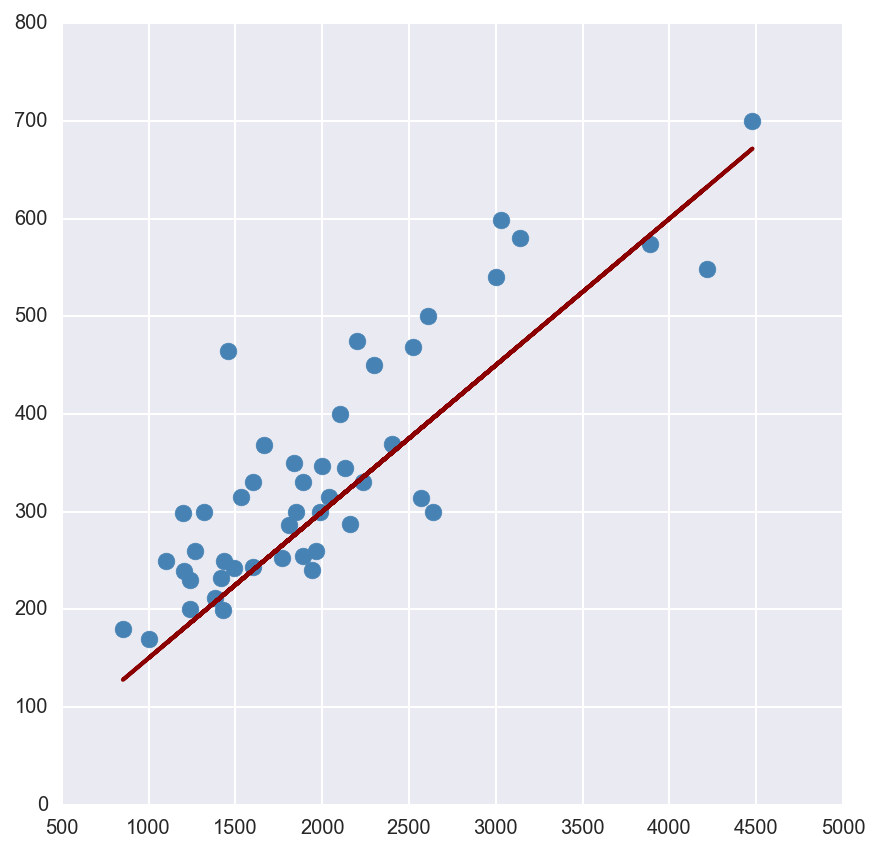

In [9]:
def plot_regression(x, y, b0, b1):
    
    fig, ax = plt.subplots(1, 1, figsize=(7,7))
    
    estimates = calculate_yhat(x, b0, b1)
    
    ax.scatter(x, y, color='steelblue', s=70)
    
    ax.plot(x, estimates, color='darkred', linewidth=2)
    
    plt.show()
    
plot_regression(sqft, price, 0, 0.15)
    
    

(You may not even be able to see the slope of the line if the magnitude of one of your variables is significantly greater than the other!)

---

### Residuals

The definition of "residuals" in linear regression is:

### $$ residual = y - \hat{y}$$

Where $y$ is the true value of our target at this observation, and $\hat{y}$ is the predicted value of our target. Simple enough. 

#### Write a function to calculate residuals below.


In [10]:
def calculate_residuals(y, yhat):
    return y-yhat

---

### Sum of squared errors and "least squares" estimation

Residuals are also referred to as errors: the amount "off" you were in your predictions.

Simple linear regression is an "ordinary least squares" method for solving linear relationships between variables. Here the ["least squares"](https://en.wikipedia.org/wiki/Least_squares) means that it _minimizes the sum of the squared residuals._

Why the squared residuals instead of just the absolute value of the residuals? Well, both are used – absolute value of residuals is often used when there are large outliers or other abnormalities in variables. 

However, [under assumptions that are typically met](https://en.wikibooks.org/wiki/Econometric_Theory/Assumptions_of_Classical_Linear_Regression_Model) minimizing the sum of squared errors is equivalent to estimating the [maximum likelihood](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).

#### Write a function to calculate the sum of squared errors/residuals.

In [11]:
def calculate_sse(residuals):
    return np.sum(residuals**2)

#### Calculate the sum of squared errors from your initial regression line above where $\beta_0$ equalled 0 and $\beta_1$ equalled 1.

In [12]:
b0, b1 = 0., 0.15
yhat = calculate_yhat(sqft, b0, b1)
residuals = calculate_residuals(price, yhat)
sse = calculate_sse(residuals)
print sse


276793.449507


#### Plot again with a new $\beta_0$ and $\beta_1$ you think might be better, and calculate the SSE

---

### Minimizing the sum of squared errors

Deriving the equation that minimizes the sum of squared errors in simple linear regression can be done using calculus. [See here](http://web.cocc.edu/srule/MTH244/other/LRJ.PDF) or [here](https://en.wikipedia.org/wiki/Simple_linear_regression) for descriptions of the derivation.

Skipping the partial derivitaves, the formulas for the $\beta_0$ and $\beta_1$ that minimize the sum of squares are:

### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

where $\bar{x}$ and $\bar{y}$ are the mean of $x$ and $y$, respectively.

#### Write functions below to calculate $\beta_0$ and $\beta_1$

In [13]:
def calculate_beta_one(x, y):
    mean_x, mean_y = np.mean(x), np.mean(y)
    y_dev = y-mean_y
    x_dev = x-mean_x
    numerator = np.sum(y_dev*x_dev)
    denominator = np.sum(x_dev**2)
    return numerator/denominator

def calculate_beta_zero(x, y, b1):
    mean_y = np.mean(y)
    mean_x = np.mean(x)
    return mean_y - b1*mean_x

b1 = calculate_beta_one(sqft, price)
b0 = calculate_beta_zero(sqft, price, b1)
print b0, b1
    

71.2704924487 0.13452528772


In [14]:
house.head(2)

,sqft,bdrms,age,price
0,2104,3,70,399.9
1,1600,3,28,329.9


328.310755434 0.283120704135


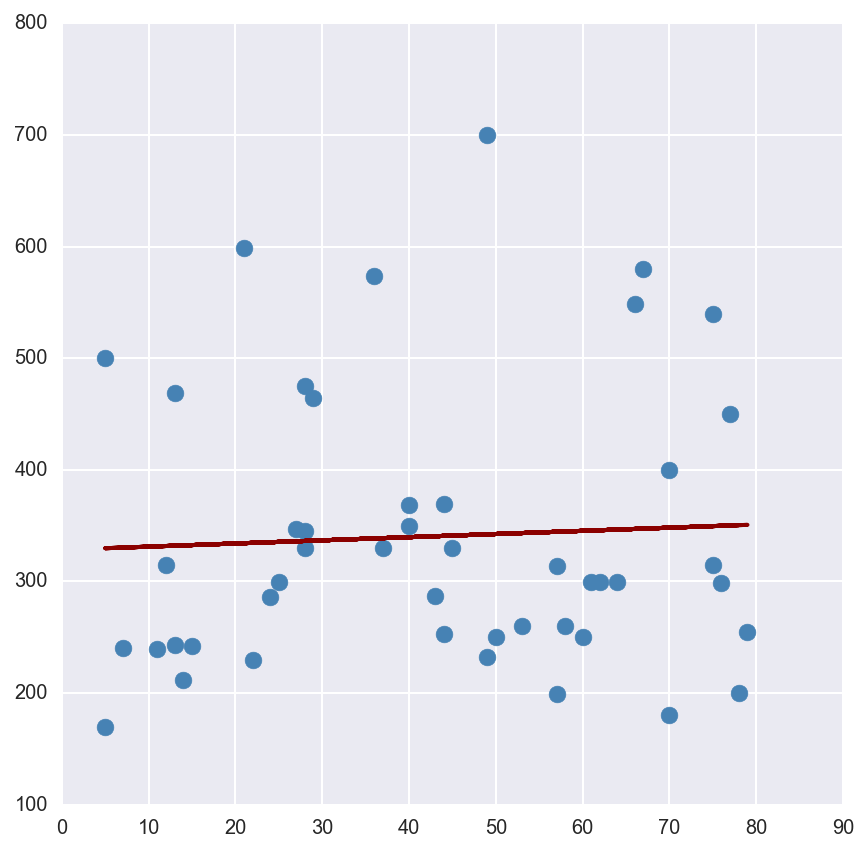

In [15]:
b1_age = calculate_beta_one(house.age.values, price)
b0_age = calculate_beta_zero(house.age.values, price, b1_age)
print b0_age, b1_age
plot_regression(house.age.values, price, b0_age, b1_age)

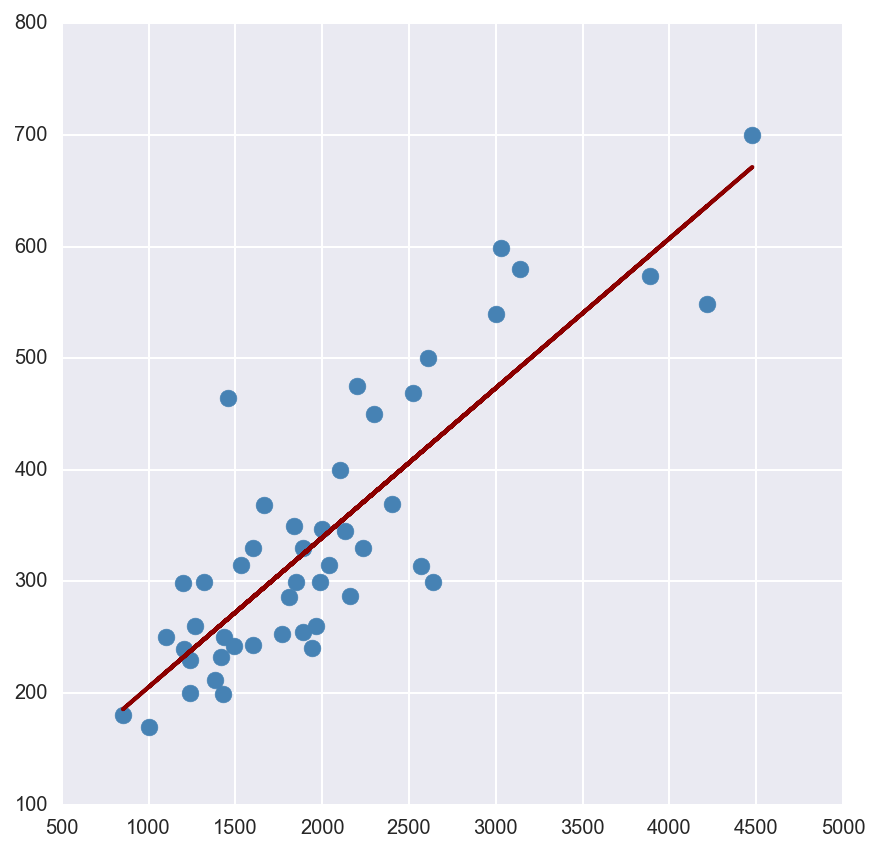

In [16]:
plot_regression(sqft, price, 71.27, 0.134)

$\beta_1$ is in fact also equivalent to:

### $$ \beta_1 = \frac{cov(x, y)}{var(x)} $$

#### Calculate the optimal $\beta_1$ and $\beta_0$. Confirm the two equations for $\beta_1$ are (essentially) the same.

#### Plot the regression with the optimal parameters and calculate the SSE.

---

### Pearson's r and how it relates to simple linear regression

Reall that the Pearson correlation coefficient, or Pearson's r, is defined as:

### $$ cor(x, y) =\frac{cov(x, y)}{std(x)std(y)} = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}\sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}} $$

If that looks similar to the equation for $\beta_1$ above, well, it's because it is.

#### Calculate the Pearson's r between your target and predictor below

For now, write your own function according to the equation above.

In [23]:
def pearson_r(x, y):
    return np.cov(x, y, ddof=1)[0,1]/(np.std(x, ddof=1)*np.std(y, ddof=1))

print pearson_r(sqft, price)

0.854987592878


In [25]:
import scipy.stats as stats
np.corrcoef(sqft, price)

array([[ 1.        ,  0.85498759],
       [ 0.85498759,  1.        ]])

In [17]:
np.cov(sqft, price)

array([[ 631551.8307123 ,   84959.69173682],
       [  84959.69173682,   15634.97648858]])

#### Create normalized versions of your target and predictor variables

In [20]:
sqft_n = (sqft - np.mean(sqft)) / np.std(sqft)
price_n = (price - np.mean(price)) / np.std(price)


#### Calculate new $\beta_0$ and $\beta_1$ for the normalized variables and plot the regression

-4.58733532756e-17 0.854987592878


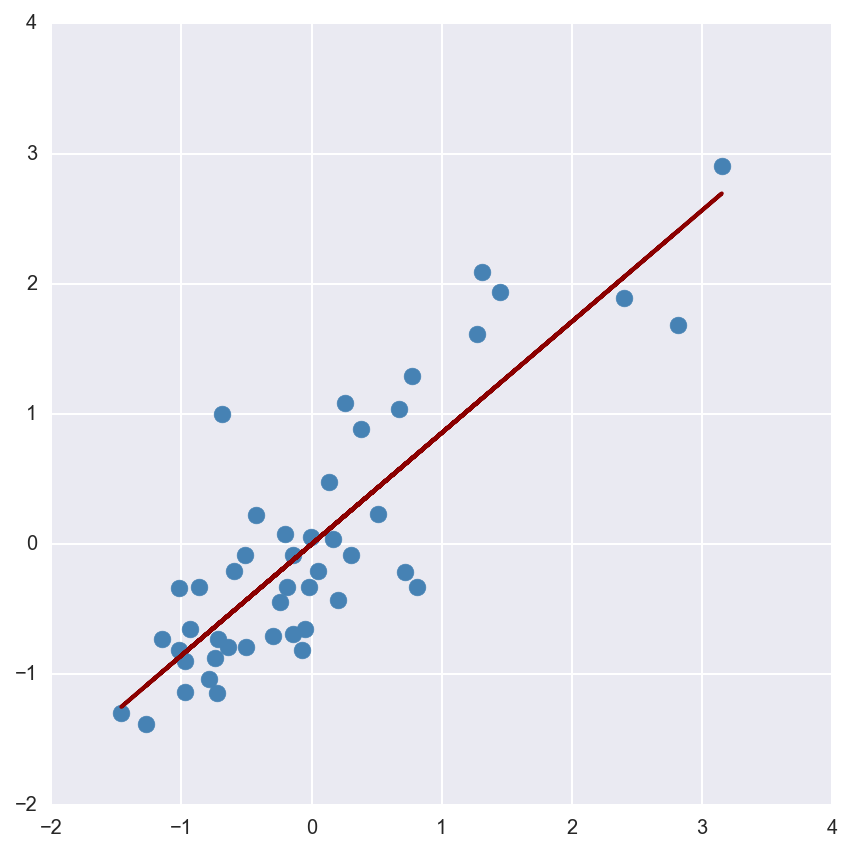

In [21]:
b1_n = calculate_beta_one(sqft_n, price_n)
b0_n = calculate_beta_zero(sqft_n, price_n, b1_n)
print b0_n, b1_n
plot_regression(sqft_n, price_n, b0_n, b1_n)

In [22]:
print np.std(price), np.std(sqft)

123.702536006 786.202618743


You can see that the $\beta_0$ coefficient and Pearson's r are _nearly_ the same, but not quite...

---

### Degrees of Freedom

The concept of "degrees of freedom" comes up a lot in statistics, and can be a source of a lot of confusion. 

A simplified definition of degrees of freedom is: 

> The number of final calculations in a statistical estimate that are allowed to vary. This restriction is necessary when the statistical estimate requires one or more other statistical estimates to be measured from the sample first.

Degrees of freedom lets you adjust for the size of your sample: estimates from smaller samples are adjusted more. Why do we do this, and how?

Take the formula for Pearson's r for the overall population $X$ and $Y$:

### $$ cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

This is equivalent to the formula above, but imagine we had _all_ the data. When we are talking about the overall (infinite) population, there are now guaranteed properties of statistical estimates that aren't guaranteed for the sample estimate.

If we want to estimate what Pearson's r would be for the _population_ but from our _sample_, then we need to take into account these guaranteed properties of the population statistic.

Because we using the mean of $x$ and the mean of $y$ to measure variance and standard deviation, to ensure that our deviations from the mean actually sum to zero we have to "leave one measurement out" in the calculation of the deviations. The last measurement of the deviation from the means has to make the deviations sum to zero!

This means that Pearson's r has **X,Y pairs - 2 degrees of freedom**, since we lose one degree of freedom for each of the two variables to adjust their mean deviations to sum to zero.

#### Calculate the Pearson's r between target and dependent variables, using keyword argument `ddof=1` in both `np.var` and `np.std`

For simple linear regression where there is just one predictor, the correlation coefficient is equivalent to the $\beta_1$ slope on $x_1$.

---

### $R^2$: the "coefficient of determination"

$R^2$ is the **amount of variance explained above baseline in your target $y$ by predictor $x$**.

It is comprised of two parts: the total sum of squares and the residual sum of squares.

The total sum of squares is defined:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares is defined:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - f_i\right)^2 $$

Where $f_i$ is the prediction by your regression for $y$ at observation $i$.

$R^2$ is then calculated:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

The total sum of squares is the **baseline model**: the amount of variance in $y$ we would explain if we were to predict each point of $y$ with just the mean of $y$.

This is equivalent to estimating $y$ with nothing but the intercept term $\beta_0$, which becomes the mean of $y$ (the best possible estimator of $y$ with a single value: maximum likelihood):

### $$ \hat{y} = \beta_0 = \bar{y} $$


#### Plot your regression again, with a new regression line representing the baseline model

Print out the SSE for the baseline and model with predictor.

#### Write a function to calculate $R^2$ for baseline and regression models and print them out

#### Print out the Pearson's r squared:

In the case of simple linear regression, where there is only one predictor, the correlation coefficient squared is equal to $R^2$.

Another formula, which is in my opinion clearer, explicitly calculates $R^2$ from the variance explained:

### $$ R^2 = 1 - \frac{var(residuals)}{var(y)} $$

#### Calculate the $R^2$ with the "variance explained" formula below

---

### Multiple linear regression

It is of course rare in regression that you will only want to predict $y$ from a single predictor $x$. Multiple linear regression predicts $y$ from more than 1 $x$ variable.

The formula for computing the $\beta$ values in multiple regression is best done with linear algebra. For more depth  [these slides are a great resource](http://statweb.stanford.edu/~nzhang/191_web/lecture4_handout.pdf).

The linear algebra formula is as follows, where $X$ is a _matrix_ of predictors $x_1$ through $x_i$ (with each column a predictor), and $y$ are the true values of $y$. There is still only 1 predicted variable:

### $$ \hat{y} = \beta X $$

_The intercept term is part of $X$! It is a column of all ones added to the columns of predictors._

Written out more simply, without the linear algebra, $\hat{y}$ is calculated:

### $$ \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n $$

The calculation of the $\beta$ values is done with the linear algebra matrix multiplication formula:

### $$ \beta = (X'X)^{-1}X'Y $$

Where $X'$ is the _transposed matrix of original matrix $X$_ and $(X'X)^-1$ is the _inverted matrix_ of $X'X$.



### Deriving the least squares solution to linear regression

With target vector $y$ and prediction matrix $X$, we can formulate a regression as:

### $$ y = \beta X + \epsilon $$

Where $\beta$ is our vector of coefficients and $\epsilon$ is our vector of errors, or residuals.

We can equivalently formulate this as a calculation of the residuals:

### $$ \epsilon = \beta X - y $$

Our goal is to minimize the sum of squared residuals. The sum of squared residuals is equivalent to the dot product of the vector of residuals:

### $$ \sum_{i=1}^n \epsilon_i^2 = 
\left[\begin{array}{cc}
\epsilon_1 \cdots \epsilon_n
\end{array}\right] 
\left[\begin{array}{cc}
\epsilon_1 \\ \cdots \\ \epsilon_n
\end{array}\right] = \epsilon' \epsilon
$$

Therefore we can write the sum of squared residuals as:

### $$ \epsilon' \epsilon = (\beta X - y)' (\beta X - y) $$

Which becomes:

### $$ \epsilon' \epsilon = y'y - y'X\beta - \beta' X' y + \beta' X' X \beta $$

Now take the derivative with respect to $\beta$:

### $$ \frac{\partial \epsilon' \epsilon}{\partial \beta} = 
-2X'y + 2X'X\beta$$

We want to minimize the sum of squared errors, and so we set the derivative to zero and solve for the beta coefficient vector:

### $$ 0 = -2X'y + 2X'X\beta \\
X'X\beta = X'y \\
\beta = (X'X)^{-1}X'y$$

Don't worry about the linear algebra here if you don't have experience with it. It's not so important to understand. Just remember that $y$ is estimated with an intercept term and each $x$ predictor multiplied by it's own $\beta$ value.

#### Create a "design matrix" with the first column a column of all 1s (intercept column) and the other columns the variables in the dataset that are not the target variable

This is easiest to do with pandas: add a column for the intercept first, then extract the matrix with `.values`

#### Compute the beta values using the formula above

**The transpose of a matrix is calculated by appending `.T` to the matrix:**

    X.T

**Matrices multipled in the formula should be done as the "dot product" with:**

    np.dot(mat1, mat2)

**Inverting a matrix is done with the function:**

    np.linalg.inv()

#### Print out the vector of betas:

#### Calculate predicted $\hat{y}$ with your predictors and $\beta$ coefficients

#### Plot the predicted values $\hat{y}$ against the true values $y$

Also plot a line through the origin at a 45 degree angle (positive slope).

#### Calculate the $R^2$ of the multiple regression model